In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

In [4]:
train = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/spaceship-titanic/test.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [13]:
test = X_test[['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    4190 non-null   object 
 1   CryoSleep     4184 non-null   object 
 2   Cabin         4177 non-null   object 
 3   Destination   4185 non-null   object 
 4   VIP           4184 non-null   object 
 5   Age           4186 non-null   float64
 6   RoomService   4195 non-null   float64
 7   FoodCourt     4171 non-null   float64
 8   ShoppingMall  4179 non-null   float64
 9   Spa           4176 non-null   float64
 10  VRDeck        4197 non-null   float64
dtypes: float64(6), object(5)
memory usage: 367.7+ KB


In [15]:
X_train = train.iloc[: , 0 : 13]
y_train = train[['Transported']]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
dtypes: float64(6), object(7)
memory usage: 883.0+ KB


In [16]:
X_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [17]:
X_num = ['PassengerId', 'Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
X_col = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [18]:
X_train[['Age']] = X_train[['Age']].fillna(X_train[['Age']].mean())
X_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = X_train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(0)

In [19]:
train_num = X_train[X_num]
train_col = pd.concat([X_train[X_col], y_train], axis = 1)
train_col = train_col.dropna()
y_train = train_col[['Transported']]
train_col = train_col[X_col]

In [20]:
train_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 8692
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  7736 non-null   object
 1   HomePlanet   7736 non-null   object
 2   CryoSleep    7736 non-null   object
 3   Cabin        7736 non-null   object
 4   Destination  7736 non-null   object
 5   VIP          7736 non-null   object
dtypes: object(6)
memory usage: 423.1+ KB


In [21]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 8692
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Transported  7736 non-null   bool 
dtypes: bool(1)
memory usage: 68.0 KB


In [22]:
X_train = pd.merge(train_col, train_num, how = 'inner', on = 'PassengerId')
X_train = X_train.iloc[: , 1 : 12]

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 7735
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7736 non-null   object 
 1   CryoSleep     7736 non-null   object 
 2   Cabin         7736 non-null   object 
 3   Destination   7736 non-null   object 
 4   VIP           7736 non-null   object 
 5   Age           7736 non-null   float64
 6   RoomService   7736 non-null   float64
 7   FoodCourt     7736 non-null   float64
 8   ShoppingMall  7736 non-null   float64
 9   Spa           7736 non-null   float64
 10  VRDeck        7736 non-null   float64
dtypes: float64(6), object(5)
memory usage: 725.2+ KB


In [24]:
X_col = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']

In [25]:
from sklearn.preprocessing import LabelEncoder

for i in X_col :
    le = LabelEncoder()
    X_train[i] = le.fit_transform(X_train[i])
    test[i] = le.fit_transform(test[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7736 entries, 0 to 7735
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7736 non-null   int64  
 1   CryoSleep     7736 non-null   int64  
 2   Cabin         7736 non-null   int64  
 3   Destination   7736 non-null   int64  
 4   VIP           7736 non-null   int64  
 5   Age           7736 non-null   float64
 6   RoomService   7736 non-null   float64
 7   FoodCourt     7736 non-null   float64
 8   ShoppingMall  7736 non-null   float64
 9   Spa           7736 non-null   float64
 10  VRDeck        7736 non-null   float64
dtypes: float64(6), int64(5)
memory usage: 725.2 KB


In [27]:
X_train.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Age',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

In [28]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [29]:
import xgboost as xgb
from xgboost import plot_importance

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=test)

In [30]:
params = {'max_depth' : 4,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'auc',
         'early_stoppings' : 100 }

xgb_model = xgb.train(params = params, dtrain = dtrain, num_boost_round = 400, early_stopping_rounds = 100, evals=[(dtrain,'train'),(dval,'eval')])

[0]	train-auc:0.836298	eval-auc:0.833687
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 100 rounds.
[1]	train-auc:0.866643	eval-auc:0.861614
[2]	train-auc:0.868387	eval-auc:0.864748
[3]	train-auc:0.872866	eval-auc:0.868078
[4]	train-auc:0.872714	eval-auc:0.868909
[5]	train-auc:0.875935	eval-auc:0.872155
[6]	train-auc:0.878206	eval-auc:0.874836
[7]	train-auc:0.878295	eval-auc:0.875508
[8]	train-auc:0.879065	eval-auc:0.875312
[9]	train-auc:0.878948	eval-auc:0.874495
[10]	train-auc:0.8814	eval-auc:0.877426
[11]	train-auc:0.883767	eval-auc:0.880964
[12]	train-auc:0.884672	eval-auc:0.882234
[13]	train-auc:0.885036	eval-auc:0.882354
[14]	train-auc:0.886743	eval-auc:0.885419
[15]	train-auc:0.886976	eval-auc:0.886181
[16]	train-auc:0.887843	eval-auc:0.886188
[17]	train-auc:0.888545	eval-auc:0.886903
[18]	train-auc:0.888886	eval-auc:0.886942
[19]	train-auc:0.889377	eval-auc:0.887419
[20]	train-auc:0.890694	eval-a

In [31]:
y_pred_probs = xgb_model.predict(dtest)

y_preds = [1 if x>0.5 else 0 for x in y_pred_probs]

In [32]:
y_preds

[1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,


In [33]:
submission = pd.DataFrame({
        "PassengerId": X_test["PassengerId"],
        "Transported":  y_preds})

submission['Transported'] = submission['Transported'].astype('bool')
submission.to_csv('submission.csv', index=False)
submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [34]:
X_test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


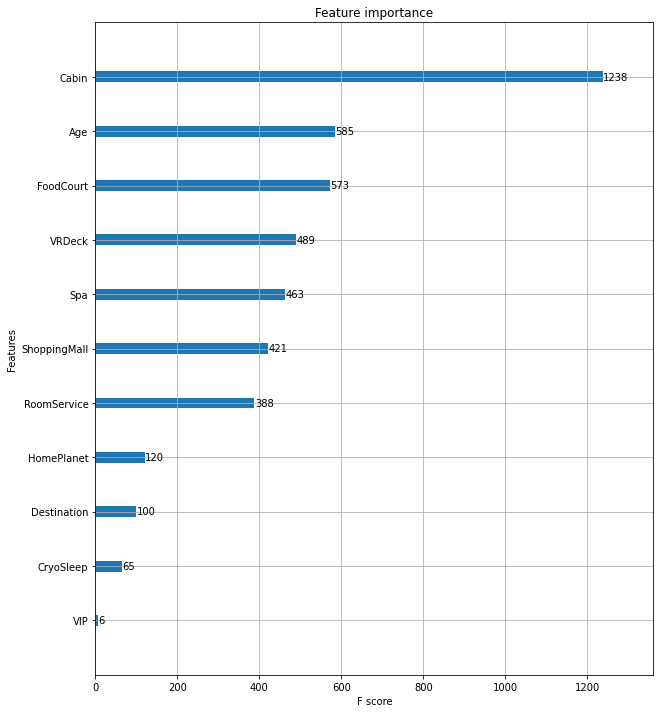

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)